In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from scipy.spatial import ConvexHull
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib import cm
from rd_solver import *
from itertools import combinations, product
import importlib
import warnings
warnings.filterwarnings("ignore")

from shared import *

In [2]:
import simulation_loader
importlib.reload(simulation_loader)
simulations = simulation_loader.Simulations(
    result_path="/run/media/cdmium/9A986168986143BB/proofreading/result_20250320_sami_error_rate",
    parameter_path="parameters_20250218_jR",
)
betas = []
for b in simulations.get_keys():
    if b != "baseline":
        betas.append(b)
betas = sorted(betas)
betas.insert(0, "baseline")

Parameters loaded.
{('parameters', None): (40000, 5)}
reading baseline
reading b_ac1
reading b_ac1_error_rate0.0001
reading b_ac1_error_rate0.001
reading b_ac_rp1
reading b_ac1_error_rate0.1
reading b_ac1_error_rate0.5
reading b_ac_rp1_sami_error_rate0.0001
reading b_ac_rp1_sami_error_rate0.5
reading b_ac1_error_rate1
reading b_ac_rp1_sami_error_rate0.001
reading b_ac_rp1_sami_error_rate0.1
reading b_ac1_error_rate0.01
reading b_ac_rp1_sami_error_rate1
reading b_ac_rp1_sami_error_rate0.01
Simulations result loaded.
{'baseline': (40000, 8), 'b_ac1': (40000, 8), 'b_ac1_error_rate0.0001': (40000, 8), 'b_ac1_error_rate0.001': (40000, 8), 'b_ac_rp1': (40000, 8), 'b_ac1_error_rate0.1': (40000, 8), 'b_ac1_error_rate0.5': (40000, 8), 'b_ac_rp1_sami_error_rate0.0001': (40000, 8), 'b_ac_rp1_sami_error_rate0.5': (40000, 8), 'b_ac1_error_rate1': (40000, 8), 'b_ac_rp1_sami_error_rate0.001': (40000, 8), 'b_ac_rp1_sami_error_rate0.1': (40000, 8), 'b_ac1_error_rate0.01': (40000, 8), 'b_ac_rp1_sami_err

In [3]:
xlim = [-1, 10]
ylim = [-3, 3]
aspect_ratio = 1
branchname = "error_rate"

In [ ]:
# Desired plot area size for each subplot (in inches)
PLOT_WIDTH = 2.5
PLOT_HEIGHT = 2.5
LEFT_MARGIN = 0.8   # Space for y-tick labels
BOTTOM_MARGIN = 0.6  # Space for x-tick labels
TITLE_SPACE = 0.4   # Space for subplot title
RIGHT_MARGIN = 0.2  # Right buffer
TOP_BUFFER = 0.4

def format_10n(x, pos):
    return f"$10^{{{int(x)}}}$"


def format_subplots(fig, axes, plot_width=PLOT_WIDTH, plot_height=PLOT_HEIGHT):
    """
    Adjust subplots from plt.subplots() to have a fixed plot area size with reserved space.
    Args:
        fig: Matplotlib Figure object
        axes: Array of Axes objects (or single Axes)
        plot_width: Width of each subplot's plot area (inches)
        plot_height: Height of each subplot's plot area (inches)
    """
    # Normalize axes to 2D array
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    if axes.ndim == 1:
        axes = axes.reshape(-1, 1)
    n_rows, n_cols = axes.shape

    # Calculate total figure size based on fixed dimensions
    total_plot_width = n_cols * plot_width
    total_plot_height = n_rows * (plot_height + TITLE_SPACE)  # Add title space per row
    fig_width = LEFT_MARGIN + total_plot_width + RIGHT_MARGIN
    fig_height = BOTTOM_MARGIN + total_plot_height + TOP_BUFFER

    # Resize figure
    fig.set_size_inches(fig_width, fig_height)

    # Reposition each subplot
    for i in range(n_rows):
        for j in range(n_cols):
            ax = axes[i, j]
            # Position in figure coordinates (0-1)
            left = (LEFT_MARGIN + j * plot_width) / fig_width
            # Bottom starts from top, accounting for title space
            bottom = (TOP_BUFFER + (n_rows - 1 - i) * (plot_height + TITLE_SPACE) + TITLE_SPACE) / fig_height
            width = plot_width / fig_width
            height = plot_height / fig_height
            ax.set_position([left, bottom, width, height])

            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            ax.spines['left'].set_color('k')
            ax.spines['left'].set_linewidth(1.0)
            ax.spines['bottom'].set_color('k')
            ax.spines['bottom'].set_linewidth(1.0)
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_10n))
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_10n))

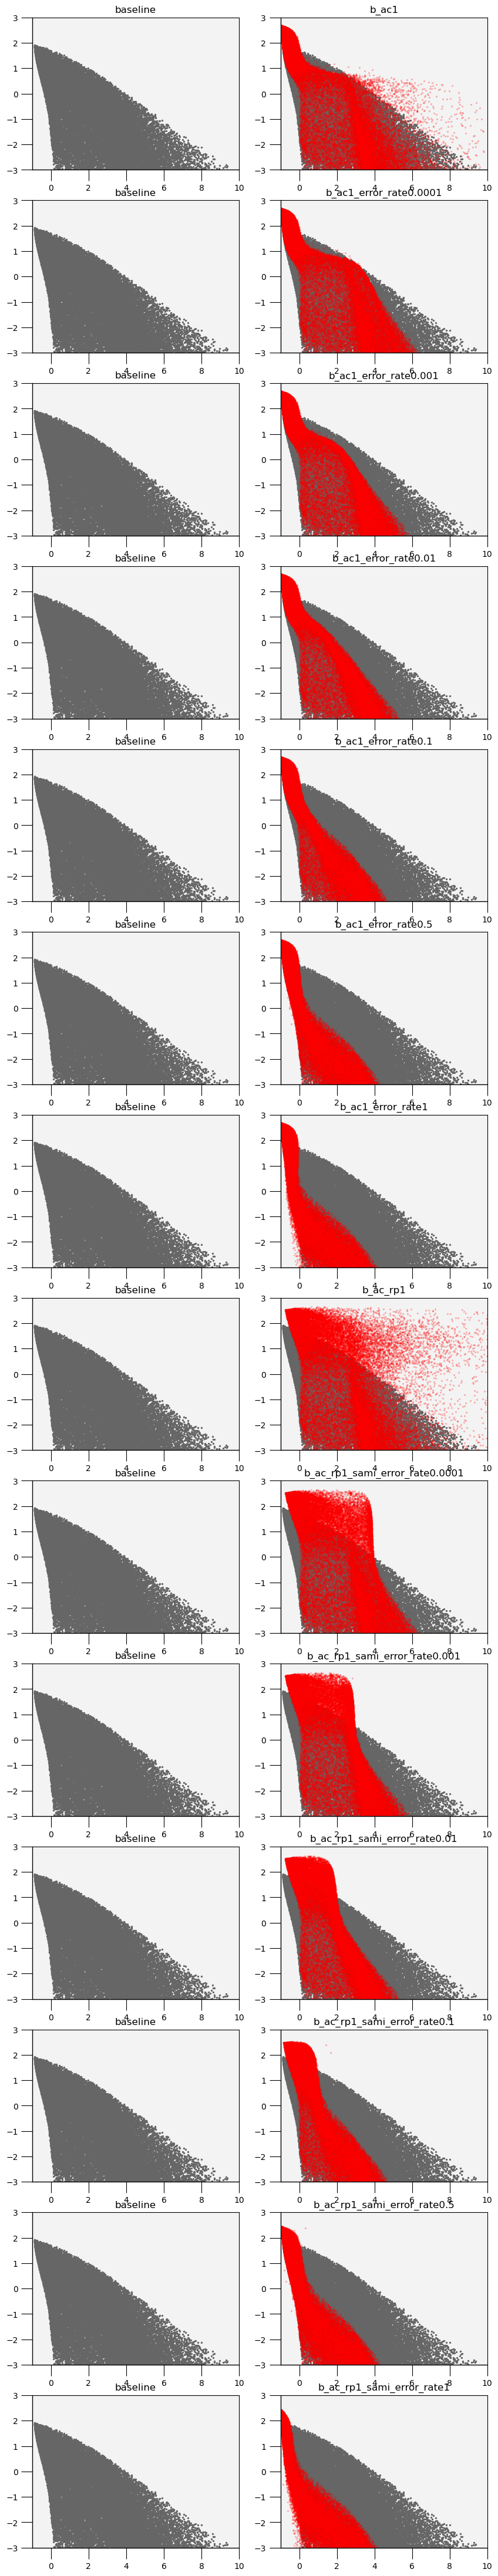

In [5]:
# basic scatter plot

fig, axs = plt.subplots(
    len(betas) - 1, 2, figsize=(2 * 5, (len(betas) - 1) * 4)
)

for i, beta in enumerate(betas[1:]):
    # Change point color to red
    axs[i, 0].scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    axs[i, 0].title.set_text("baseline")
    axs[i, 1].scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    axs[i, 1].scatter(
        simulations.get_fidelity_log(beta),
        simulations.get_AC_log(beta),
        2, color='red', alpha=0.2
    )
    axs[i, 1].title.set_text(beta)
for ax in axs.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.plot([0, 25], [1.5, -11])

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)

    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)
    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)

# plt.savefig("simple_scatter.svg")
plt.show()

In [ ]:
for b in betas:
    s = simulations.get_fidelity_log(b)
    a = simulations.get_AC_log(b)
    simulations.add_subset(
        ("display", b),
        np.bitwise_and(
            np.bitwise_and(
                s >= xlim[0],
                s <= xlim[1],
            ),
            np.bitwise_and(
                a >= ylim[0],
                a <= ylim[1],
            )
        )
    )
NA = 6.022e23
h3 = grid_spacing * grid_spacing * grid_spacing * 1e-15
c_R_threshold = 3e4 / h3 / NA / 1e-9
# receptor_per_cell = c_R * h3 * NA * 1e-9
for b in betas:
    r = simulations.get_r_total(b)
    simulations.add_subset(
        ("reasonable c_R", b),
        r <= c_R_threshold,
    )

In [ ]:
# basic scatter plot

fig, axs = plt.subplots(
    len(betas) - 0, 2, figsize=(2 * 5, (len(betas) - 0) * 4)
)

for i, beta in enumerate(betas):
    # Change point color to red
    # s = axs[i, 0].scatter(
    #     simulations.get_fidelity_log("baseline"),
    #     simulations.get_AC_log("baseline"),
    #     0.5,
    #     c=simulations.get_r_total_log("baseline"),
    #     alpha=1
    # )
    # axs[i, 0].title.set_text("baseline no feedback")
    # axs[i, 1].colorbar(s)
    # axs[i, 1].scatter(
    #     simulations.get_fidelity_log("baseline"),
    #     simulations.get_AC_log("baseline"),
    #     2,
    #     color=[0.4, 0.4, 0.4],
    #     alpha=1
    # )
    s = axs[i, 0].scatter(
        simulations.get_fidelity_log(
            beta,
            subsets=[("display", beta), ("reasonable c_R", beta)]
        ),
        simulations.get_AC_log(
            beta,
            subsets=[("display", beta), ("reasonable c_R", beta)]
        ),
        0.5,
        c=simulations.get_r_total_log(
            beta,
            subsets=[("display", beta), ("reasonable c_R", beta)]
        ),
        alpha=1
    )
    axs[i, 0].title.set_text(beta)
    fig.colorbar(s, ax=axs[i, 0], location="left")
for ax in axs.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.plot([0, 25], [1.5, -11])

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)

    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)
    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)

# plt.savefig("simple_scatter.svg")
plt.show()

In [ ]:
# scatter plot for 20250116 self acitvation/mutual inhibition sweeping
DEFAULT_META_PARAMETERS = {
    # beta for activator, repressor co-affect one same output
    # k and n is extracted from the standalone version
    "b_ac_rp": 0,
    # beta for activator affect one individual output
    "b_ac": 0,
    "k_ac": 1,
    "n_ac": 1,
    # beta for repressor affect one individual output
    "b_rp": 0,
    "n_rp": 1,
    "k_rp": 1,
    "sender_region": 200,
    "receiver_region": 251,
    "sender_ratio": 1,
    "n_gridpoints": 451,
    "receptor_preequilibium": 0
}


class MetaParameter(dict):
    def __init__(self, **kwargs):
        super().__init__(DEFAULT_META_PARAMETERS)
        self.update(kwargs)

    def set_print_name(self, name):
        self.name = name

    def as_string(self):
        if hasattr(self, "name"):
            return self.name
        keys = []
        for k in self:
            if self[k] != DEFAULT_META_PARAMETERS[k]:
                keys.append(k)
        if len(keys) == 0:
            return "baseline"
        else:
            return "_".join(map(lambda x: x + str(self[x]), keys))



# self activation only
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.scatter(
    simulations.get_fidelity_log("baseline"),
    simulations.get_AC_log("baseline"),
    2,
    color=[0.4, 0.4, 0.4],
    alpha=1
)

_x = np.arange(-1, 10, step=0.1)
_y = -0.01028971 * _x * _x + -0.38431568 * _x + 0.67707293
axs.plot(_x, _y)

axs.title.set_text("baseline")

axs.set_xlim(xlim)
axs.set_ylim(ylim)

fig.tight_layout()
plt.show()

In [ ]:
outside_count = {}


def upper_boarder(x):
    return -0.01028971 * x * x + -0.38431568 * x + 0.67707293


# # self activation only
# for (i, k_ac), (j, (b_ac, n_ac)) in product(
#     enumerate([1, 10, 100]),
#     enumerate(product([1, 2], [1, 3]))
# ):
#     mp = MetaParameter(b_ac=b_ac, n_ac=n_ac, k_ac=k_ac)
#     beta = mp.as_string()
#     outside_count[beta] = np.count_nonzero(
#         simulations.get_AC_log(beta) >
#         upper_boarder(simulations.get_fidelity_log(beta))
#     )

# # repression only
# for (i, k_rp), (j, (b_rp, n_rp)) in product(
#     enumerate([1, 10, 100, 1000]),
#     enumerate(product([1, 2], [1, 3]))
# ):
#     mp = MetaParameter(b_rp=b_rp, n_rp=n_rp, k_rp=k_rp)
#     beta = mp.as_string()
#     outside_count[beta] = np.count_nonzero(
#         simulations.get_AC_log(beta) >
#         upper_boarder(simulations.get_fidelity_log(beta))
#     )



# for (i, (k_ac, k_rp)), (j, (b_ac, b_rp, n_ac, n_rp)) in product(
#     enumerate(product([1, 10, 100], [1, 10, 100, 1000])),
#     enumerate(product([1, 2], [1, 2], [1, 3], [1, 3]))
# ):
#     mp = MetaParameter(
#         b_ac=b_ac, n_ac=n_ac, k_ac=k_ac,
#         b_rp=b_rp, n_rp=n_rp, k_rp=k_rp,
#     )
#     beta = mp.as_string()
#     outside_count[beta] = np.count_nonzero(
#         simulations.get_AC_log(beta) >
#         upper_boarder(simulations.get_fidelity_log(beta))
#     )


for (i, (k_ac, k_rp)), (j, (b_ac_rp, n_ac, n_rp)) in product(
    enumerate(product([1, 10, 100], [1, 10, 100, 1000])),
    enumerate(product([1, 2], [1, 3], [1, 3]))
):
    mp = MetaParameter(
        b_ac_rp=b_ac_rp,
        n_ac=n_ac, k_ac=k_ac,
        n_rp=n_rp, k_rp=k_rp,
    )
    beta = mp.as_string()
    outside_count[beta] = np.count_nonzero(
        simulations.get_AC_log(beta) >
        upper_boarder(simulations.get_fidelity_log(beta))
    )

max_k = list(outside_count.keys())[0]
for k in outside_count:
    if outside_count[k] > outside_count[max_k]:
        max_k = k
print(max_k, outside_count[max_k])

for k in outside_count:
    if outside_count[k] > 250:
        print(k, outside_count[k])

In [ ]:
# self activation only
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
for (i, k_ac), (j, (b_ac, n_ac)) in product(enumerate([1, 10, 100]), enumerate(product([1, 2], [1, 3]))):
    mp = MetaParameter(b_ac=b_ac, n_ac=n_ac, k_ac=k_ac)
    beta = mp.as_string()
    ax = axs[i, j]

    ax.scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    ax.scatter(
        simulations.get_fidelity_log(beta),
        simulations.get_AC_log(beta),
        2, color='red', alpha=1
    )
    ax.title.set_text(beta)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig.suptitle("self activation only", fontsize=24)
fig.tight_layout()
plt.show()

# repression only
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
for (i, k_rp), (j, (b_rp, n_rp)) in product(enumerate([1, 10, 100, 1000]), enumerate(product([1, 2], [1, 3]))):
    mp = MetaParameter(b_rp=b_rp, n_rp=n_rp, k_rp=k_rp)
    beta = mp.as_string()
    ax = axs[i, j]

    ax.scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    ax.scatter(
        simulations.get_fidelity_log(beta),
        simulations.get_AC_log(beta),
        2, color='red', alpha=1
    )
    ax.title.set_text(beta)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig.suptitle("mutual inhibition only", fontsize=24)
fig.tight_layout()
plt.show()


# activation, repression act individually
fig, axs = plt.subplots(12, 16, figsize=(80, 48))
for (i, (k_ac, k_rp)), (j, (b_ac, b_rp, n_ac, n_rp)) in product(
    enumerate(product([1, 10, 100], [1, 10, 100, 1000])),
    enumerate(product([1, 2], [1, 2], [1, 3], [1, 3]))
):
    mp = MetaParameter(
        b_ac=b_ac, n_ac=n_ac, k_ac=k_ac,
        b_rp=b_rp, n_rp=n_rp, k_rp=k_rp,
    )
    beta = mp.as_string()
    ax = axs[i, j]

    ax.scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    ax.scatter(
        simulations.get_fidelity_log(beta),
        simulations.get_AC_log(beta),
        2, color='red', alpha=1
    )
    ax.title.set_text(beta)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig.suptitle("activation, repression individually", fontsize=24)
fig.tight_layout()
plt.show()

# activation, repression act together
fig, axs = plt.subplots(12, 8, figsize=(40, 48))
for (i, (k_ac, k_rp)), (j, (b_ac_rp, n_ac, n_rp)) in product(
    enumerate(product([1, 10, 100], [1, 10, 100, 1000])),
    enumerate(product([1, 2], [1, 3], [1, 3]))
):
    mp = MetaParameter(
        b_ac_rp=b_ac_rp,
        n_ac=n_ac, k_ac=k_ac,
        n_rp=n_rp, k_rp=k_rp,
    )
    beta = mp.as_string()
    ax = axs[i, j]

    ax.scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    ax.scatter(
        simulations.get_fidelity_log(beta),
        simulations.get_AC_log(beta),
        2, color='red', alpha=1
    )
    ax.title.set_text(beta)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig.suptitle("activation, repression together", fontsize=24)
fig.tight_layout()
plt.show()

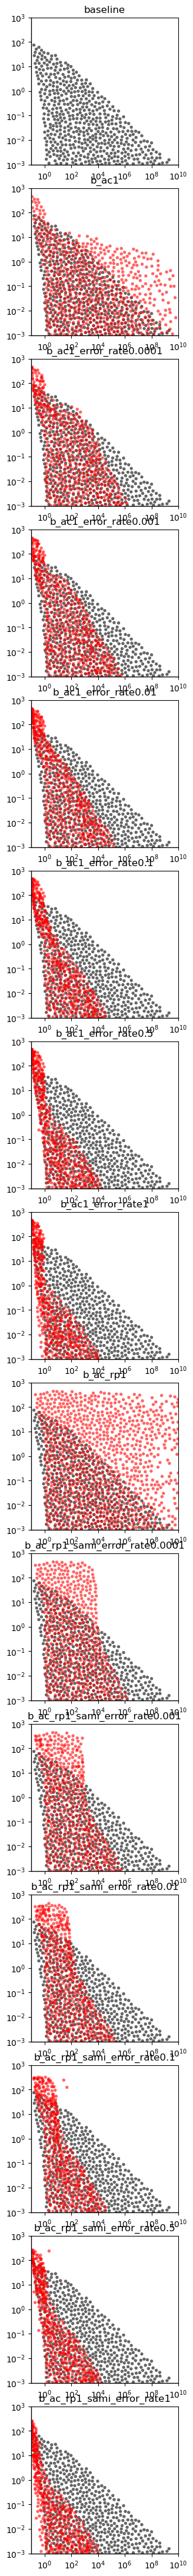

In [6]:
# add subset of proofreading and enough concentration
for b in betas:
    simulations.add_subset(
        ("proofreading", b),
        np.bitwise_and(
            simulations.get_fidelity_log(b) > 0,
            simulations.get_subset(subsets=[("valid", b)])
        )
    )
for b in betas:
    simulations.add_subset(
        ("active", b),
        np.bitwise_and(
            simulations.get_AC_log(b) > -1,
            simulations.get_subset(subsets=[("valid", b)])
        )
    )

# simplified scatter
distance_threshold = 0.022

# create subset for simplified data
for b in betas:
    subset = []
    f_simple = np.array([])
    ac_simple = np.array([])
    for f, ac in zip(
        simulations.get_fidelity_log(b), simulations.get_AC_log(b)
    ):
        if f < xlim[0] or f > xlim[1] or ac < ylim[0] or ac > ylim[1]:
            subset.append(False)
        elif np.all(
            np.linalg.norm(
                np.array(
                    [
                        (f_simple - f) / (xlim[1] - xlim[0]),
                        (ac_simple - ac) / (ylim[1] - ylim[0])
                    ]
                ),
                axis=0
            ) > distance_threshold
        ):
            f_simple = np.append(f_simple, f)
            ac_simple = np.append(ac_simple, ac)
            subset.append(True)
        else:
            subset.append(False)
    subset = np.array(subset)
    # increase point number for group with too small point set
    if b != "baseline" and len(f_simple) < np.count_nonzero(
        simulations.get_subset(subsets=[("simplified", "baseline")])
    ):
        false_indices = np.where(subset == False)[0]
        indices_to_change = np.random.choice(
            false_indices,
            size=np.count_nonzero(
                simulations.get_subset(subsets=[("simplified", "baseline")])
            ) - len(f_simple),
            replace=False
        )
        subset[indices_to_change] = True

    simulations.add_subset(
        ("simplified", b),
        subset
    )


fig, axs = plt.subplots(len(betas), 1, figsize=(5, len(betas) * 5))
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.5,
    hspace=0.5
)

axs[0].scatter(
    simulations.get_fidelity_log(
        beta="baseline", subsets=["simplified"]
    ),
    simulations.get_AC_log(
        beta="baseline", subsets=["simplified"]
    ),
    15,
    color=[0.4, 0.4, 0.4],
    alpha=1,
    edgecolor="none",
)
axs[0].title.set_text(betas[0])
for i, b in enumerate(betas[1:]):
    axs[i + 1].scatter(
        simulations.get_fidelity_log(
            beta="baseline", subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta="baseline", subsets=["simplified"]
        ),
        15,
        color=[0.4, 0.4, 0.4],
        alpha=1,
        edgecolor="none",
    )
    axs[i + 1].scatter(
        simulations.get_fidelity_log(
            beta=b, subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta=b, subsets=["simplified"]
        ),
        15,
        color='red',
        alpha=0.6,
        edgecolor="none",
    )
    axs[i + 1].title.set_text(b)

format_subplots(fig, axs)

plt.savefig(branchname + " simplified_scatter.svg")
plt.show()
#  TODO highlight

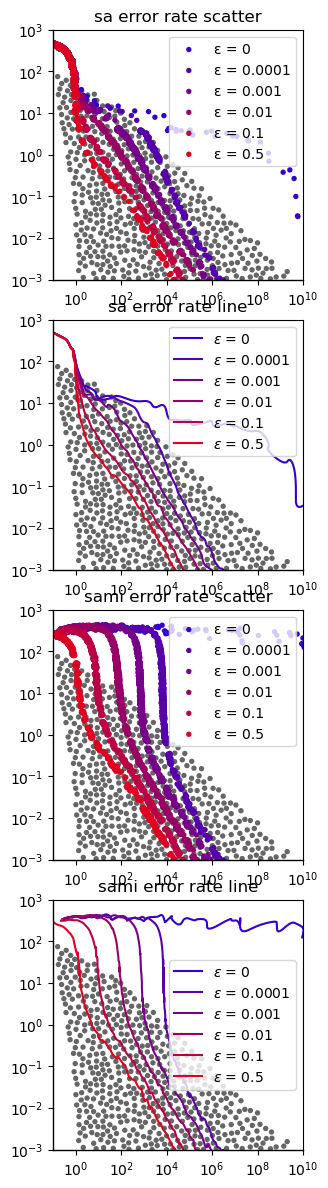

In [42]:
from scipy.interpolate import make_interp_spline, BSpline
fig, axs = plt.subplots(4, 1, figsize=(5, 20))

for ax in axs.flatten():
    ax.scatter(
        simulations.get_fidelity_log(
            beta="baseline", subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta="baseline", subsets=["simplified"]
        ),
        15,
        color=[0.4, 0.4, 0.4],
        alpha=1,
        edgecolor="none",
    )
axs[0].title.set_text("sa error rate scatter")
axs[1].title.set_text("sa error rate line")
axs[2].title.set_text("sami error rate scatter")
axs[3].title.set_text("sami error rate line")


# this width is relative width/height
# e.g. the distance between cornors is 1.0
boundary_width = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
distance_threshold = 1e-5
error_rates = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]
for i, beta in enumerate(betas[1:7] + betas[8:-1]):
    boundary_step = 0.2 if i < 6 else 0.1
    # if i == 6:
    #     boundary_step = 0.2
    row = 0 if i < 6 else 1

    # find the trade-off boundary
    boundary_f = []
    boundary_a = []

    k = (ylim[1] - ylim[0]) / (xlim[1] - xlim[0])

    for b in np.arange(2 * ylim[0] - ylim[1], ylim[1] + 1, boundary_step):
        f = simulations.get_fidelity_log(beta=beta)
        a = simulations.get_AC_log(beta=beta)
        # filter only points near line
        indices = (-k * f + a - b) ** 2 < boundary_step / 4
        if np.count_nonzero(indices) == 0:
            continue
        f = f[indices]
        a = a[indices]
        # find which point is the most top right one (farest along slop k)
        # get rid of abnormal points
        distance = a + f / k
        sort_indices = np.argsort(distance)
        if i < 6:
            max_i = sort_indices[-1]
        elif distance[sort_indices[-1]] - distance[sort_indices[-2]] > \
            2 * (distance[sort_indices[-2]] - distance[sort_indices[-3]]):
                max_i = sort_indices[-2]
        else:
            max_i = sort_indices[-1]
        boundary_f.append(f[max_i])
        boundary_a.append(a[max_i])
    boundary_f, boundary_a = np.unique([boundary_f, boundary_a], axis=1)
    # find all point near the boundary
    f_plot = []
    a_plot = []
    for f, a in zip(
        simulations.get_fidelity_log(beta=beta, subsets=["valid"]),
        simulations.get_AC_log(beta=beta, subsets=["valid"]),
    ):
        if np.any(
            ((boundary_f - f) / (xlim[1] - xlim[0])) ** 2 +
                ((boundary_a - a) / (ylim[1] - ylim[0])) ** 2 < boundary_width[i % 7] ** 2
        ) and not np.any(
            ((f_plot - f) / (xlim[1] - xlim[0])) ** 2 +
                ((a_plot - a) / (ylim[1] - ylim[0])) ** 2 < distance_threshold ** 2
        ):
            f_plot.append(f)
            a_plot.append(a)
    axs[2 * row + 0].scatter(
        f_plot, a_plot,
        15,
        color=[
            (i % 6) / 6 / 5 * 4 + 0.2,
            0,
            1 - (i % 6) / 6 / 5 * 4 - 0.2
        ],
        alpha=1,
        edgecolor="none",
        label="ε = {}".format(error_rates[i % 6]),
    )

    # plot smooth line
    # this is not perfect, just as a temporary solution
    # boundary_f = np.array(boundary_f)
    # boundary_a = np.array(boundary_a)
    param = np.linspace(0, 1, boundary_f.size)

    spl = make_interp_spline(param, np.c_[boundary_f, boundary_a], k=2)  # type: BSpline
    f_new, a_smooth = spl(np.linspace(0, 1, boundary_f.size * 100)).T
    axs[2 * row + 1].plot(
        f_new, a_smooth,
        15,
        color=[
            (i % 6) / 6 / 5 * 4 + 0.2,
            0,
            1 - (i % 6) / 6 / 5 * 4 - 0.2
        ],
        alpha=1,
        label="$\epsilon$ = {}".format(error_rates[i % 6])
    )

axs[0].legend()
axs[2].legend()
# somehow line plot have duplicated legend, a workaround to avoid this
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())
handles, labels = axs[3].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[3].legend(by_label.values(), by_label.keys())

format_subplots(fig, axs)

plt.savefig(branchname + " boundary_scatter.svg")
plt.show()

In [ ]:

ggcolors = {
    1: ["#F8766D"],
    2: ["#F8766D", "#00BFC4"],
    3: ["#F8766D", "#00BA38", "#619CFF"],
    4: ["#F8766D", "#7CAE00", "#00BFC4", "#C77CFF"],
    5: ["#F8766D", "#A3A500", "#00BF7D", "#00B0F6", "#E76BF3"],
    6: ["#F8766D", "#B79F00", "#00BA38", "#00BFC4", "#619CFF", "#F564E3"],
    7: ["#F8766D", "#C49A00", "#53B400", "#00C094", "#00B6EB", "#A58AFF", "#FB61D7"],
    8: ["#F8766D", "#CD9600", "#7CAE00", "#00BE67", "#00BFC4", "#00A9FF", "#C77CFF", "#FF61CC"],
}


# * analyze shifted points

# hull_data_fidelity_AC_log = np.array(
#     [heatmap_data_fidelity_log, heatmap_data_AC_log]
# ).T
# hull_data_fidelity_AC_log_feedback = np.array(
#     [heatmap_data_fidelity_log_feedback, heatmap_data_AC_log_feedback]
# ).T

# create convex hull object
hull = ConvexHull(
    np.array([
        simulations.get_fidelity_log(beta="baseline", subsets=["proofreading", "active", "valid"]),
        simulations.get_AC_log(beta="baseline", subsets=["proofreading", "active", "valid"]),
    ]).T
)


def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull, Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p) >= 0


# calcualte which points (with feedback) is inside convex hull (without
# feedback) or not
for b in betas:
    simulations.add_subset(
        ("in_hull", b),
        in_hull(
            np.array([
                simulations.get_fidelity_log(beta=b),
                simulations.get_AC_log(beta=b)
            ]).T,
            hull.points
        )
    )


# plot
fig, axs = plt.subplots(len(betas) - 1, 1, figsize=(5, (len(betas) - 1) * 4))

for i, b in enumerate(betas[1:]):
    # scatter for beta==0 (no feedback)
    axs[i].scatter(
        simulations.get_fidelity_log(beta="baseline", subsets=["in_hull"]),
        simulations.get_AC_log(beta="baseline", subsets=["in_hull"]),
        5,
        color=[0.25, 0.25, 0.25],
        alpha=1
    )
    # draw convex hull
    for simplex in hull.simplices:
        axs[i].plot(
            simulations.get_fidelity_log(
                beta="baseline", subsets=["proofreading", "active"]
            )[simplex],
            simulations.get_AC_log(
                beta="baseline", subsets=["proofreading", "active"]
            )[simplex],
            "--",
            color=ggcolors[2][1],
            lw=2.5,
        )
    # scatter for inside hull
    axs[i].scatter(
        simulations.get_fidelity_log(beta=b, subsets=["in_hull"]),
        simulations.get_AC_log(beta=b, subsets=["in_hull"]),
        5,
        color=ggcolors[2][0],
        alpha=0.5,
    )
    # scatter for outside hull
    axs[i].scatter(
        simulations.get_fidelity_log(
            beta=b, subsets=["proofreading", "active"], not_subsets=["in_hull"]
        ),
        simulations.get_AC_log(
            beta=b, subsets=["proofreading", "active"], not_subsets=["in_hull"]
        ),
        5,
        color="red",
        alpha=0.5,
    )
    axs[i].title.set_text(b)

for ax in axs.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.plot([0, 25], [1.5, -11])

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)

    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)
    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)

plt.savefig("convex_hall.svg", dpi=150)
plt.show()


In [ ]:
for b in betas:
    print(
        "beta: {}, inside triangle: {}, outside trignale: {}, total: {}"
        .format(
            b,
            len(
                simulations.get_AC(
                    beta=b,
                    subsets=["valid", "proofreading", "active", "in_hull"]
                )
            ),
            len(
                simulations.get_AC(
                    beta=b,
                    subsets=["valid", "proofreading", "active"],
                    not_subsets=["in_hull"]
                )
            ),
            len(
                simulations.get_AC(
                    beta=b, subsets=["valid", "proofreading", "active"]
                )
            )
        )
    )

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
param_ranges = {
    "D": (0, 50),
    "log(j_A)": (-5, -2),
    "log(j_R)": (-5, -2),
    "log(k_off_AR)": (-5, -2),
    "log(gamma)": (-5, -2)
}


def normalize_param(value, param_name):
    min_val, max_val = param_ranges[param_name]
    return (value - min_val) / (max_val - min_val)


betas = ["baseline", "b_ac1", "b_ac_rp1"]
n_bins = 50
cmap = "Blues"
output_dir = "heatmap_proofreading_overlay"
os.makedirs(output_dir, exist_ok=True)
for beta in betas:
    fig = plt.figure(figsize=(16, 8))
    main_ax = fig.add_subplot(111)
    main_ax.set_xlim(-0.5, 4.5)
    main_ax.set_ylim(0, 1)
    main_ax.axis('off')
    parameters_data = simulations.get_parameters_log(subsets=[("valid", beta)])
    fidelity = simulations.get_fidelity_log(beta=beta, subsets=["valid"])
    activity = simulations.get_AC_log(beta=beta, subsets=["valid"])
    # define different group by the fidelity and activity; append
    groups = []
    proofread_active_indices = []
    for i in range(len(activity)):
        if fidelity[i] > 0 and activity[i] > -1:
            groups.append("proofread, active")
            proofread_active_indices.append(i)
        elif fidelity[i] <= 0 and activity[i] > -1:
            groups.append("no proofread, active")
        else:
            groups.append("other")
    # plot
    param_names = ["D", "log(j_A)", "log(j_R)", "log(k_off_AR)", "log(gamma)"]
    axes = []
    for i, param in enumerate(param_names):
        ax = fig.add_axes([0.05 + i * 0.1, 0.1, 0.15, 0.7])
        ax.set_ylim(0, 1)
        ax.set_xlim(-0.01, 0.1)
        ax.axis('off')
        min_val, max_val = param_ranges[param]
        yticks = [0, 0.5, 1]
        yticklabels = [f"{min_val:.1f}",
                       f"{(max_val + min_val) / 2:.1f}",
                       f"{max_val:.1f}"]
        ax.yaxis.set_ticks(yticks)
        ax.yaxis.set_ticklabels(yticklabels, fontsize=8)
        # "proofread, active"
        raw_data = parameters_data[proofread_active_indices, i]
        # normalization
        norm_data = [normalize_param(x, param) for x in raw_data]
        # plot the heatmap
        hist, _ = np.histogram(norm_data, bins=np.linspace(0, 1, n_bins + 1))
        smoothed = gaussian_filter1d(hist, sigma=2)
        extent = [-0.01, 0.1, 0, 1]
        ax.imshow(smoothed.reshape(-1, 1),
                  aspect=2.7,
                  extent=extent,
                  cmap=cmap,
                  origin='lower',
                  alpha=0.7)
        axes.append(ax)
    colors = {'proofread, active': '#C7F464', 'no proofread, active': '#C7F464'}
    for idx in proofread_active_indices:
        group = groups[idx]
        if group not in colors:
            continue
        norm_values = [normalize_param(p, param_names[i])
                       for i, p in enumerate(parameters_data[idx][:5])]
        x = np.arange(5)
        y = norm_values
        y_transformed = [0.1 + 0.7 * val for val in y]
        main_ax.plot(x, y_transformed,
                     color=colors[group],
                     linewidth=0.1,
                     alpha=0.2)
    plt.title(f"{beta}")
    plt.savefig(
        os.path.join(
            output_dir,
            f"overlay_{beta}.svg"),
        dpi=300,
        bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
# distribution of each paramters
fig, axs = plt.subplots(
    6, 5, figsize=(20, 24), width_ratios=[1, 1, 1, 1, 0.05]
)

for (i, parameter) in enumerate([
    "D_0",
    "j_A0 (log)",
    "j_R0 (log)",
    "koff_AR0 (log)",
    "gamma0 (log)",
    "koff_AR0 + gamma0 (log)"
]):
    norm = Normalize(
        vmin=np.nanmin(simulations.get_parameters_log()[:, i]),
        vmax=np.nanmax(simulations.get_parameters_log()[:, i]))
    cmap = cm.viridis  # 颜色映射
    colors = cmap(norm(simulations.get_parameters_log()[:, i]))

    for j, b in enumerate(betas):
        axs[i][j].scatter(
            simulations.get_fidelity_log(beta=b),
            simulations.get_AC_log(beta=b),
            1,
            color=colors,
            alpha=0.5
        )
        axs[i][j].title.set_text(parameter + " beta=" + str(b))

    cbar = fig.colorbar(
        cm.ScalarMappable(norm=norm, cmap=cmap), cax=axs[i, -1]
    )
    cbar.set_label(parameter, fontsize=14)

for ax in axs[:, :-1].flatten():
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)
    # ax.plot([0, 25], [1.5, -11], c="red")

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)

plt.show()

In [ ]:
# # divide each paramter into several parts and observe their distribution
# parts = 4
# fig, axs = plt.subplots(6, parts, figsize=(parts * 5, 24))

# for (i, parameter) in enumerate([
#     "D_0",
#     "j_A0 (log)",
#     "j_R0 (log)",
#     "koff_AR0 (log)",
#     "gamma0 (log)",
#     "koff_AR0 + gamma0 (log)"
# ]):
#     parameter_data_without_feedback = parameters_without_feedback_valid[:, i]
#     sort_indices_without_feedback = parameter_data_without_feedback.argsort()
#     parameter_data_with_feedback = parameters_with_feedback_valid[:, i]
#     sort_indices_with_feedback = parameter_data_with_feedback.argsort()

#     for j, ((i_without_feedback, i_with_feedback)) in enumerate(zip(
#         np.array_split(sort_indices_without_feedback, 4),
#         np.array_split(sort_indices_with_feedback, 4),
#     )):
#         # Change point color to red
#         axs[i][j].scatter(
#             heatmap_data_fidelity_log[(i_without_feedback)],
#             heatmap_data_AC_log[(i_without_feedback)],
#             1,
#             color=[0.4, 0.4, 0.4],
#             alpha=0.1
#         )
#         axs[i][j].scatter(
#             heatmap_data_fidelity_log_feedback[(i_with_feedback)],
#             heatmap_data_AC_log_feedback[(i_with_feedback)],
#             1,
#             color="red",
#             alpha=0.1
#         )
#         axs[i][j].title.set_text(
#             "{} {:.2f}-{:.2f} {:.2f}-{:.2f}".format(
#                 parameter,
#                 parameter_data_without_feedback[(i_without_feedback)].min(),
#                 parameter_data_without_feedback[(i_without_feedback)].max(),
#                 parameter_data_with_feedback[(i_with_feedback)].min(),
#                 parameter_data_with_feedback[(i_with_feedback)].max(),
#             )
#         )

#         axs[i][j].set_xlim(xlim)
#         axs[i][j].set_ylim(ylim)
#         axs[i][j].plot([0, 25], [1.5, -11], c="blue")

#         axs[i][j].set_facecolor('#F3F3F3')
#         axs[i][j].spines['left'].set_color('k')
#         axs[i][j].spines['left'].set_linewidth(1.0)
#         axs[i][j].spines['bottom'].set_color('k')
#         axs[i][j].spines['bottom'].set_linewidth(1.0)

#         publish_on = True
#         if publish_on:
#             axs[i][j].tick_params(axis="y", labelleft=True, size=14)
#             axs[i][j].tick_params(axis="x", labelbottom=True, size=14)
#             # plt.savefig('figures fig3a(3).svg', dpi=150)
#         else:
#             axs[i][j].set_ylabel(
#                 r'concentration of $AA_{p}$ (nM)', fontsize=14
#             )
#             axs[i][j].set_xlabel(
#                 r'fidelity, $\log_{10}(AA_{p}/BA_{p})$',
#                 fontsize=14
#             )


# plt.show()

In [ ]:
# x_min = xlim[0]
# x_max = xlim[1]
# y_min = ylim[0]
# y_max = ylim[1]
# nbins = 100
# X, Y = np.mgrid[x_min:x_max:nbins * 1j, y_min:y_max:nbins * 1j]
# indices = np.vstack([X.ravel(), Y.ravel()])
# kernel = gaussian_kde(np.swapaxes(hull_data_fidelity_AC_log, 0, 1))
# Z_without_feedback = np.reshape(kernel(indices).T, X.shape)
# kernel = gaussian_kde(np.swapaxes(hull_data_fidelity_AC_log_feedback, 0, 1))
# Z_with_feedback = np.reshape(kernel(indices).T, X.shape)
# Z_overlap = np.minimum(Z_without_feedback, Z_with_feedback)
# Z_difference = Z_with_feedback - Z_without_feedback

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# # Change point color to red
# # axs[0].imshow(
# #     np.rot90(Z_without_feedback), cmap=plt.cm.gist_earth_r,
# #           extent=[x_min, x_max, y_min, y_max]
# #     )
# percentile = 80
# fig.suptitle("{} percentile".format(percentile))
# axs[0].contour(
#     X,
#     Y,
#     Z_without_feedback,
#     colors='blue',
#     linewidths=1,
#     alpha=1,
#     linestyles="solid",
#     label="Group 1",
#     # levels=[
#     #     np.percentile(Z_without_feedback, percentile),
#     # ],
# )
# # axs[1].contourf(X, Y, Z_difference, levels=20, cmap='RdBu', alpha=0.8, label="Difference")
# axs[1].contour(
#     X,
#     Y,
#     Z_without_feedback,
#     colors="blue",
#     linewidths=1,
#     alpha=1,
#     linestyles="solid",
#     label="Group 1",
#     # levels=[
#     #     np.percentile(Z_without_feedback, percentile),
#     # ],
# )
# axs[1].contour(
#     X,
#     Y,
#     Z_with_feedback,
#     colors='orange',
#     linewidths=1,
#     alpha=1,
#     linestyles="solid",
#     label="Group 2",
#     # levels=[
#     #     np.percentile(Z_with_feedback, percentile),
#     # ],
# )

# for ax in axs:
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
#     # ax.plot([0, 25], [1.5, -11])

#     # ax.set_ylim([-10, 2])

#     ax.set_facecolor('#F3F3F3')
#     ax.spines['left'].set_color('k')
#     ax.spines['left'].set_linewidth(1.0)
#     ax.spines['bottom'].set_color('k')
#     ax.spines['bottom'].set_linewidth(1.0)

# publish_on = True
# if publish_on:
#     axs[0].tick_params(axis="y", labelleft=True, size=14)
#     axs[0].tick_params(axis="x", labelbottom=True, size=14)
#     axs[1].tick_params(axis="y", labelleft=True, size=14)
#     axs[1].tick_params(axis="x", labelbottom=True, size=14)
# else:
#     ax.set_ylabel(r'concentration of $AA_{p}$ (nM)', fontsize=14)
#     ax.set_xlabel(r'fidelity, $\log_{10}(AA_{p}/BA_{p})$', fontsize=14)

# plt.show()

In [ ]:
# rbfs = []
# nbins = 100
# for (i, parameter) in enumerate([
#     "D_0",
#     "j_A0 (log)",
#     "j_R0 (log)",
#     "koff_AR0 (log)",
#     "gamma0 (log)",
#     "koff_AR0 + gamma0 (log)"
# ]):
#     parameter_data_without_feedback = parameters_without_feedback_valid[:, i]

#     parameter_data_with_feedback = parameters_with_feedback_valid[:, i]

#     rbf_without_feedback = RBFInterpolator(
#         np.column_stack((heatmap_data_fidelity_log, heatmap_data_AC_log)),
#         parameter_data_without_feedback,
#         smoothing=1,
#     )

#     rbf_with_feedback = RBFInterpolator(
#         np.column_stack(
#             (heatmap_data_fidelity_log_feedback, heatmap_data_AC_log_feedback)
#         ),
#         parameter_data_with_feedback,
#         smoothing=1,
#     )
#     rbfs.append([rbf_without_feedback, rbf_with_feedback])# 

In [ ]:
# # modify boundary style
# # from plotting.py alpha_shapes
# import numpy as np
# from matplotlib.patches import PathPatch
# from matplotlib.path import Path
# from alpha_shapes.boundary import Boundary, get_boundaries


# def plot_alpha_shape(ax, alpha_shape, **kwargs):
#     for boundary in get_boundaries(alpha_shape):
#         _plot_boundary(ax, boundary, **kwargs)


# def _plot_boundary(ax, boundary: Boundary, **kwargs):
#     """
#     Plot a boundary using matplotlib's PathPatch.
#     see https://stackoverflow.com/a/70533052/6060982
#     """
#     exterior = Path(boundary.exterior)
#     holes = [Path(hole) for hole in boundary.holes]
#     path = Path.make_compound_path(exterior, *holes)
#     patch = PathPatch(path, **kwargs)
#     ax.add_patch(patch)

# # def point_inside


# shaper_without_feedback = Alpha_Shaper(
#     np.column_stack((
#         heatmap_data_fidelity_log,
#         heatmap_data_AC_log,
#     ))
# )
# alpha_without_feedback, alpha_shape_without_feedback = shaper_without_feedback.optimize()
# shaper_with_feedback = Alpha_Shaper(
#     np.column_stack((
#         heatmap_data_fidelity_log_feedback,
#         heatmap_data_AC_log_feedback,
#     ))
# )
# alpha_with_feedback, alpha_shape_with_feedback = shaper_with_feedback.optimize()

In [ ]:
# x_min = xlim[0]
# x_max = xlim[1]
# y_min = ylim[0]
# y_max = ylim[1]
# contour_level = 20
# # distribution of each paramters
# fig, axs = plt.subplots(6, 4, figsize=(15, 24), width_ratios=[1, 0.1, 1, 0.1])

# for i, (parameter, min_val, max_val) in enumerate([
#     ("D_0", 0, 50),
#     ("j_A0 (log)", -5, -3),
#     ("j_R0 (log)", -5, -3),
#     ("koff_AR0 (log)", -5, -3),
#     ("gamma0 (log)", -6, -3),
#     ("koff_AR0 + gamma0 (log)", -5, -2.8),
# ]):
#     # X, Y = np.mgrid[x_min:x_max:nbins * 1j, y_min:y_max:nbins * 1j]

#     Z_without_feedback = rbfs[i][0](
#         np.column_stack((heatmap_data_fidelity_log, heatmap_data_AC_log))
#     )

#     Z_with_feedback = rbfs[i][1](
#         np.column_stack(
#             (heatmap_data_fidelity_log_feedback, heatmap_data_AC_log_feedback)
#         )
#     )

#     # min_val = np.nanmin([Z_without_feedback, Z_with_feedback])
#     # max_val = np.nanmax([Z_without_feedback, Z_with_feedback])
#     color_levels = np.linspace(start=min_val, stop=max_val, num=contour_level)

#     # contour = axs[i][0].contourf(
#     #     X,
#     #     Y,
#     #     Z_without_feedback,
#     #     levels=color_levels,
#     #     cmap='viridis',
#     #     vmin=min_val,
#     #     vmax=max_val,
#     # )

#     contour = axs[i][0].tricontourf(
#         shaper_without_feedback,
#         Z_without_feedback,
#         levels=color_levels,
#         cmap="viridis",
#         vmin=min_val,
#         vmax=max_val,
#     )

#     axs[i][0].title.set_text(parameter + " without feedback")
#     cbar = fig.colorbar(contour, cax=axs[i][1])
#     cbar.set_label(parameter, fontsize=14)

#     contour = axs[i][2].tricontourf(
#         shaper_with_feedback,
#         Z_with_feedback,
#         levels=color_levels,
#         cmap="viridis",
#         vmin=min_val,
#         vmax=max_val,
#     )

#     plot_alpha_shape(
#         axs[i][2],
#         alpha_shape_without_feedback,
#         fill=False,
#         edgecolor="orange",
#         lw=3,
#         alpha=0.7,
#     )

#     # contour = axs[i][2].contourf(
#     #     X,
#     #     Y,
#     #     Z_with_feedback,
#     #     levels=color_levels,
#     #     cmap='viridis',
#     #     vmin=min_val,
#     #     vmax=max_val,
#     # )
#     axs[i][2].title.set_text(parameter + " with feedback")
#     cbar = fig.colorbar(contour, cax=axs[i][3])
#     cbar.set_label(parameter, fontsize=14)

#     # plot_alpha_shape(
#     #     axs[i][2],
#     #     alpha_shape_without_feedback,
#     #     fill=False,
#     #     edgecolor="b",
#     #     lw=3,
#     #     alpha=0.5,
#     # )
#     # plot_alpha_shape(
#     #     axs[i][2],
#     #     alpha_shape_with_feedback,
#     #     fill=False,
#     #     edgecolor="r",
#     #     lw=3,
#     #     alpha=0.5,
#     # )

#     for ax in axs[i][[0, 2]]:

#         ax.set_xlim(xlim)
#         ax.set_ylim(ylim)
#         # ax.plot([0, 25], [1.5, -11], c="red")

#         ax.set_facecolor('#F3F3F3')
#         ax.spines['left'].set_color('k')
#         ax.spines['left'].set_linewidth(1.0)
#         ax.spines['bottom'].set_color('k')
#         ax.spines['bottom'].set_linewidth(1.0)

#     publish_on = True
#     if publish_on:
#         axs[i][0].tick_params(axis="y", labelleft=True, size=14)
#         axs[i][0].tick_params(axis="x", labelbottom=True, size=14)
#         axs[i][1].tick_params(axis="y", labelleft=True, size=14)
#         axs[i][1].tick_params(axis="x", labelbottom=True, size=14)
#         # plt.savefig('figures fig3a(3).svg', dpi=150)
#     else:
#         axs[i][0].set_ylabel(r'concentration of $AA_{p}$ (nM)', fontsize=14)
#         axs[i][0].set_xlabel(
#             r'fidelity, $\log_{10}(AA_{p}/BA_{p})$',
#             fontsize=14
#         )

# fig.tight_layout()
# plt.savefig("parameters_distribution_smoothed.svg", dpi=100)
# plt.show()

In [ ]:
import sys

import sankey_mod
sys.path.append("./")



importlib.reload(sankey_mod)


sankey_raw = []


# Combine into a single array
group_names = [
    "1 outside_hull",
    "2 inside_hull",
    "3 not_proofreading",
    "4 not_active",
    "5 not_proofreading_active",
    "6 invalid",
]


def map_group_name(v):
    for name, boolean in zip(group_names, v):
        if boolean:
            return name

_betas = [0, 1]
for b in _betas:
    is_invalid = simulations.get_subset(
        subsets=None, not_subsets=[("valid", b)]
    )
    is_not_proofreading = simulations.get_subset(
        subsets=[("active", b)], not_subsets=[("proofreading", b)]
    )
    is_not_active = simulations.get_subset(
        subsets=[("proofreading", b)], not_subsets=[("active", b)]
    )
    is_not_proofreading_active = simulations.get_subset(
        subsets=[("valid", b)],
        not_subsets=[("proofreading", b), ("active", b)]
    )
    is_in_hull = simulations.get_subset(subsets=[("in_hull", b)])
    is_outside_hull = simulations.get_subset(
        subsets=[("proofreading", b), ("active", b)],
        not_subsets=[("in_hull", b)]
    )

    booleans = np.array([
        is_outside_hull,
        is_in_hull,
        is_not_proofreading,
        is_not_active,
        is_not_proofreading_active,
        is_invalid,
    ])

    sankey_raw.append(
        list(map(map_group_name, booleans.T))
    )

sankey_raw = np.array(sankey_raw)

sankey_table = {}

for sim in sankey_raw.T:
    if None in sim or "6 invalid" in sim:
        continue
    if tuple(sim) not in sankey_table:
        sankey_table[tuple(sim)] = 1
    else:
        sankey_table[tuple(sim)] += 1

# remove all zero-weight
keys = list(sankey_table.keys())
for i, k in enumerate(keys):
    if sankey_table[k] == 0:
        sankey_table.pop(k)



plt.figure(figsize=(6, 3))
sankey_mod.sankey(
    pd.DataFrame(
        [[sankey_table[k]] + list(k) for k in sankey_table],
        columns=["Weight"] + ["beta={}".format(b) for b in _betas],
    ),
    # since we have only one not proofreading & not active, just assign white for it
    nodes_color=ggcolors[4] + ["#FFFFFF"],
    labels_size=8,
    sort_flows_by_nodes=True
)
plt.savefig("sankey_full.svg")
plt.show()

In [ ]:
import importlib
import sys

import sankey_mod
sys.path.append("./")


importlib.reload(sankey_mod)


sankey_raw = []


# Combine into a single array
group_names = [
    "1 outside_hull",
    "2 inside_hull",
    "3 not_proofreading_or_active",
    "4 invalid",
]


def map_group_name(v):
    for name, boolean in zip(group_names, v):
        if boolean:
            return name


for b in betas:
    is_invalid = simulations.get_subset(
        subsets=None, not_subsets=[("valid", b)]
    )
    is_not_proofreading = simulations.get_subset(
        subsets=[("valid", b)],
        not_subsets=[("proofreading", b)]
    )
    is_not_active = simulations.get_subset(
        subsets=[("valid", b)],
        not_subsets=[("active", b)]
    )
    is_in_hull = simulations.get_subset(subsets=[("in_hull", b)])
    is_outside_hull = simulations.get_subset(
        subsets=[("proofreading", b), ("active", b)],
        not_subsets=[("in_hull", b)]
    )

    booleans = np.array([
        is_outside_hull,
        is_in_hull,
        np.bitwise_or(is_not_proofreading, is_not_active),
        is_invalid,
    ])

    sankey_raw.append(
        list(map(map_group_name, booleans.T))
    )

sankey_raw = np.array(sankey_raw)

zoomin_size = 14000
b0 = betas[0]
print(betas)
for i, b1 in enumerate(betas[1:]):
    # b1 = beta_dict[b1]
    sankey_raw_subset = sankey_raw[[0, i + 1], :]
    sankey_table = {}

    for sim in sankey_raw_subset.T:
        if None in sim or "4 invalid" in sim:
            continue
        if tuple(sim) not in sankey_table:
            sankey_table[tuple(sim)] = 1
        else:
            sankey_table[tuple(sim)] += 1

    # remove all zero-weight
    keys = list(sankey_table.keys())
    for k in keys:
        if sankey_table[k] == 0:
            sankey_table.pop(k)

    # remove color of outside .. if having no that value
    sankey_colors = ["#515358", "#dbe185"]
    keys = list(sankey_table)
    for k in keys:
        if k[1] == "1 outside_hull":
            sankey_colors = ["#515358", "#c03d4b", "#dbe185"]
            break

    print( b0, b1, sankey_table)

    plt.figure(figsize=(3, 4))
    sankey_mod.sankey(
        pd.DataFrame(
            [[sankey_table[k]] + list(k) for k in sorted(sankey_table)],
            columns=["Weight"] + [b0, b1],
        ),
        nodes_color=sankey_colors,
        sort_flows_by_nodes=True,
        labels_size=2.5,
        titles_size=5,
        labels_color="black" if i == 0 else None,
    )
    plt.savefig("sankey_merged_{} to {}.svg".format(b0, b1))
    plt.show()

    sim_count = 0
    for k in sankey_table:
        if k != ('3 not_proofreading_or_active', '3 not_proofreading_or_active'):
            sim_count += sankey_table[k]

    # skip zoom if got minus weight
    if zoomin_size < sim_count:
        continue
    sankey_table[
        ('3 not_proofreading_or_active', '3 not_proofreading_or_active')
    ] = zoomin_size - sim_count

    plt.figure(figsize=(3, 4))
    sankey_mod.sankey(
        pd.DataFrame(
            [[sankey_table[k]] + list(k) for k in sorted(sankey_table)],
            columns=["Weight"] + [b0, b1],
        ),
        nodes_color=sankey_colors,
        sort_flows_by_nodes=True,
        labels_size=2.5,
        titles_size=5,
        # labels_color="black" if i == 0 else None,
        labels_color=None if i == 0 else None,
    )

    plt.savefig("sankey_merged_zoom_{} to {}.svg".format(b0, b1))
    plt.show()

In [ ]:
import numpy as np
import zarr
from shared import *
result_path="/run/media/cdmium/9A986168986143BB/proofreading/result_20250303"
parameter_path="parameters_20250218_jR"

z = zarr.open(parameter_path, "r")
parameters = z[:]
print("parameters: ", parameters.shape)

t_max = "172800"
betas = ["baseline", "b_ac1", "b_ac_rp1"]
z = zarr.open(result_path, mode="r")
print(list(z.keys()))

# get the indices for b_ac_rp1
ac = z["b_ac_rp1"][t_max][Species.AC.value][:, -1]
bc = z["b_ac_rp1"][t_max][Species.BC.value][:, -1]

proofreading_indices = np.bitwise_and(
    ac > 0.1,
    ac / bc > 10,
)
proofreading_indices = np.where(proofreading_indices)[0]

In [ ]:
import matplotlib.pyplot as plt
read_index = np.random.choice(proofreading_indices)
betas = ["baseline", "b_ac1", "b_ac_rp1", "b_rp1"]
results = []
acs = []
bcs = []
for b in betas:
    # results.append(z[b][t_max][:, np.random.randint(low=0, high=39999), :])
    acs.append(z[b][t_max][Species.AC.value, :, -1])
    bcs.append(z[b][t_max][Species.BC.value, :, -1])
results = np.array(results)

# results: shape [n_beta, n_species(8), length(451)]

# ac = results[:, Species.AC.value, :]
# bc = results[:, Species.BC.value, :]


# ac_log = np.log10(ac)
# fidelity = ac / bc
# fidelity_log = np.log10(fidelity)

# fig, ax = plt.subplots(1, 1)
# ax2 = ax.twinx()
# for i, b in enumerate(betas):
#     ax.plot(ac_log[i], label="ac " + b)
#     # ax2.plot(fidelity_log[i], label="fidelity " + b)
# ax.legend()
# ax2.legend()
# plt.show()




In [ ]:
acs = np.array(acs)
bcs = np.array(bcs)

In [ ]:
for (b, ac, bc) in zip(betas, acs.mean(axis=-1), bcs.mean(axis=-1)):
    print("{} mean_ac: {} mean_bc: {}".format(b, ac, bc))

In [ ]:
n_bins = 40

fig, axs = plt.subplots(5, 6, figsize=(30, 20))

b0 = beta_dict[betas[0]]
for i, b1 in enumerate(betas[1:]):
    worsened_indices = np.bitwise_and(
        sankey_raw[0] == "2 inside_hull",
        sankey_raw[i + 1] == "3 not_proofreading_or_active"
    )
    for j, (parameter, p_min, p_max) in enumerate(
        [
            ("D_0", 0, 50),
            ("j_A0 (log)", -5, -3),
            ("j_R0 (log)", -5, -3),
            ("koff_AR0 (log)", -5, -3),
            ("gamma0 (log)", -5, -2.5),
            # ("koff_AR0 + gamma0 (log)", np.log10(2e-5), np.log10(1e-3 + 10**-2.5)),
        ]
    ):
        bin_define = np.arange(p_min, p_max, (p_max - p_min) / n_bins)
        axs[j, i].hist(simulations.get_parameters_log()[worsened_indices, j], bins=n_bins)
        axs[j, i].title.set_text(beta_dict[b1] + " " + parameter)

plt.show()

    

In [ ]:
beta_combinations = list(combinations(betas, 2))
fig, axs = plt.subplots(
    5, len(beta_combinations),
    figsize=(5 * len(beta_combinations), 20)
)
for j, (b1, b2) in enumerate(beta_combinations):
    # recalculate hull for each b1
    hull = ConvexHull(
        np.array([
            simulations.get_fidelity_log(beta=b1, subsets=["proofreading", "active", "valid"]),
            simulations.get_AC_log(beta=b1, subsets=["proofreading", "active", "valid"]),
        ]).T
    )
    b1_is_not_proofreading_or_not_active = np.bitwise_or(
        simulations.get_subset(
            subsets=[("valid", b1)], not_subsets=[("proofreading", b1)]
        ),
        simulations.get_subset(
            subsets=[("valid", b1)], not_subsets=[("active", b1)]
        ),
    )
    b1_is_in_hull = simulations.get_subset(
        subsets=[("valid", b1), ("proofreading", b1), ("active", b1)]
    )
    b2_is_not_proofreading_or_not_active = np.bitwise_or(
        simulations.get_subset(
            subsets=[("valid", b2)], not_subsets=[("proofreading", b2)]
        ),
        simulations.get_subset(
            subsets=[("valid", b2)], not_subsets=[("active", b2)]
        ),
    )
    b2_is_in_hull = in_hull(
        np.array([
            simulations.get_fidelity_log(beta=b2),
            simulations.get_AC_log(beta=b2)
        ]).T,
        hull.points
    )
    b2_is_outside_hull = np.bitwise_and(
        simulations.get_subset(
            subsets=[("valid", b2), ("proofreading", b2), ("active", b2)],
        ),
        np.bitwise_not(b2_is_in_hull)
    )

    is_unchanged = np.bitwise_and(
        b1_is_not_proofreading_or_not_active,
        b2_is_not_proofreading_or_not_active
    )
    is_improved = np.bitwise_and(
        b1_is_not_proofreading_or_not_active,
        b2_is_in_hull,
    )
    is_proofreading = b2_is_in_hull
    is_overcoming_tradeoff = b2_is_outside_hull
    is_worsened = np.bitwise_and(
        b1_is_in_hull,
        b2_is_not_proofreading_or_not_active
    )
    
    # print(b1, b2)
    # print("unchanged", np.count_nonzero(is_unchanged))
    # print("improved", np.count_nonzero(is_improved))
    # print("overcoming", np.count_nonzero(is_overcoming_tradeoff))
    # print("worsened", np.count_nonzero(is_worsened))

    for i, (parameter, p_min, p_max) in enumerate(
        [
            ("D_0", 0, 50),
            ("j_A0 (log)", -5, -3),
            ("j_R0 (log)", -5, -3),
            ("koff_AR0 (log)", -5, -3),
            ("gamma0 (log)", -5, -2.5),
            # ("koff_AR0 + gamma0 (log)", np.log10(2e-5), np.log10(1e-3 + 10**-2.5)),
        ]
    ):
        bin_define = np.arange(p_min, p_max, (p_max - p_min) / n_bins)
        
        hist, edges = np.histogram(
            simulations.get_parameters_log()[is_unchanged, i],
            bins=bin_define
        )
        bin_centers = (edges[:-1] + edges[1:]) / 2
        smoothed_hist = gaussian_filter1d(hist, sigma=1)
        axs[i, j].plot(
            bin_centers, smoothed_hist / 1000,
            color=ggcolors[5][1],
            label="unchanged"
        )

        hist, edges = np.histogram(
            simulations.get_parameters_log()[is_proofreading, i],
            bins=bin_define
        )
        bin_centers = (edges[:-1] + edges[1:]) / 2
        smoothed_hist = gaussian_filter1d(hist, sigma=1)
        axs[i, j].plot(
            bin_centers, smoothed_hist / 1000,
            color=ggcolors[5][2],
            label="proofread"
        )

        hist, edges = np.histogram(
            simulations.get_parameters_log()[is_overcoming_tradeoff, i],
            bins=bin_define
        )
        bin_centers = (edges[:-1] + edges[1:]) / 2
        smoothed_hist = gaussian_filter1d(hist, sigma=1)
        axs[i, j].plot(
            bin_centers, smoothed_hist / 1000,
            color=ggcolors[5][3],
            label="overcoming"
        )

        hist, edges = np.histogram(
            simulations.get_parameters_log()[is_worsened, i],
            bins=bin_define
        )
        bin_centers = (edges[:-1] + edges[1:]) / 2
        smoothed_hist = gaussian_filter1d(hist, sigma=1)
        axs[i, j].plot(
            bin_centers, smoothed_hist / 1000,
            color=ggcolors[5][4],
            label="worsen"
        )

for ax in axs.flatten():
    ax.legend()
for ax, (b1, b2) in zip(axs[0], beta_combinations):
    ax.title.set_text("beta: {} -> {}".format(b1, b2))
for i, (row, parameter) in enumerate(zip(
    axs,
    [
        "D_0",
        "j_A0 (log)",
        "j_R0 (log)",
        "koff_AR0 (log)",
        "gamma0 (log)",
        "koff_AR0 + gamma0 (log)",
    ]
)):
    for ax in row:
        ax.set_xlabel(parameter)

plt.savefig("kde_change_vs_parameter.svg")
plt.show()

In [ ]:
import zarr

NA = 6.022e23
h3 = grid_spacing * grid_spacing * grid_spacing * 1e-15

z = zarr.open("/run/media/cdmium/HDD_yanyuxuan/proofreading/result_20250216", mode="r")
meta_parameters = []
R_total = {}
for b in z.keys():
    print(b)
    group_b = z[b]
    R_total[b] = array_t[[Species.AR.value, Species.BR.value, Species.R.value], :, :]
    meta_parameters.append(group_b.attrs)
    t = "172800"
    array_t = group_b[t]

for k in R_total:
    R_total[k] = R_total[k].sum(axis=0)

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
for (k, v), ax in zip(R_total.items(), axs.flatten()):
    c_R = v[:, 200:].mean(axis=1)
    c_R = c_R[c_R < 1e250]
    # receptor_per_cell = c_R * h3 * NA * 1e-9

    ax.hist(c_R, bins=20)
    ax.title.set_text(k)
    
plt.show()


    # print("{} concentration: {} nmole/L, {} receptor/cell".format(k, c_R, receptor_per_cell))